#Table of content 


1. Problem statement 
2. Exploratory Data Analysis


# Problem statement 


An education company named X education sells online courses to industry professionals. On any given day, many professionals  who are interested in the courses land land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales teams start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X Education is around 30%.


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.





#Exploratory Data Analysis

## Libraries

First of all, we import all the necessary libraries to perform the necessary steps.

In [396]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline




## Dataset

After mounting your google drive, use pandas to read the csv file and check the first rows of the dataset.

In [397]:
lead_data_df = pd.read_csv('/content/drive/MyDrive/X-Education/Lead_Scoring.csv')
lead_data_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Visualize all the info related to the columns.

In [398]:
lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##Data Dictionary

In [399]:
dictionary =pd.read_excel("/content/drive/MyDrive/X-Education/Leads Data Dictionary.xlsx")
dictionary.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identified.
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."


In [400]:
pd.set_option('display.max_colwidth', -1)
dictionary.drop('Unnamed: 0',inplace=True,axis=1)
dictionary.columns = dictionary.iloc[1]
dictionary = dictionary.iloc[2:]
dictionary.reset_index(drop=True, inplace=True)
dictionary.head(len(dictionary))

<ipython-input-400-9d00c7c23093>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


Store the information of the original dataset, before data cleaning

In [401]:
n_rows = lead_data_df.shape[0]
print('Number of original rows: {0}'.format(n_rows))



Number of original rows: 9240


##Data Preprocessing


Rename the features for simplicity

In [402]:
lead_data_df.rename(columns={'Converted':'Converted',
                            'Prospect ID':'ProspectId',
                            'Lead Number':'LeadNumber',
                            'Lead Origin':'LeadOrigin',
                            'Lead Source':'LeadSource',
                            'Do Not Email':'DndEmail',
                            'Do Not Call':'DndCall',
                            'TotalVisits':'TotalVisits',
                            'Total Time Spent on Website':'TotalWebsiteTime',
                            'Page Views Per Visit':'PagesPerVisit',
                            'Last Activity':'LastActivity',
                            'Country':'Country',
                            'Specialization':'Specialization',
                            'How did you hear about X Education':'HowHeard',
                            'What is your current occupation':'Occupation',
                            'What matters most to you in choosing a course':'MattersMost',
                            'Search':'Search',
                            'Magazine':'Magazine',
                            'Newspaper Article':'PaperArticle',
                            'X Education Forums':'EducationForum',
                            'Newspaper':'Newspaper',
                            'Digital Advertisement':'DigitalAd',
                            'Through Recommendations':'Recommendation',
                            'Receive More Updates About Our Courses':'ReceiveCourseUpdate',
                            'Tags':'Tags',
                            'Lead Quality':'LeadQuality',
                            'Update me on Supply Chain Content':'UpdateSupplyChain',
                            'Get updates on DM Content':'UpdateDMContent',
                            'Lead Profile':'LeadProfile',
                            'City':'City',
                            'Asymmetrique Activity Index':'ActivityIndex',
                            'Asymmetrique Profile Index':'ProfileIndex',
                            'Asymmetrique Activity Score':'ActivityScore',
                            'Asymmetrique Profile Score':'ProfileScore',
                            'I agree to pay the amount through cheque':'ChequePayment',
                            'A free copy of Mastering The Interview':'FreeCopy',
                            'Last Notable Activity':'LastNotableActivity'},
                   inplace=True)       


bring the target variable at the first index of the dataframe 


In [403]:
variables= list(lead_data_df.columns)
variables.insert(0,variables.pop(variables.index('Converted')))
lead_data_df = lead_data_df.loc[:,variables]


In [404]:
lead_data_df.head()

,Converted,ProspectId,LeadNumber,LeadOrigin,LeadSource,DndEmail,DndCall,TotalVisits,TotalWebsiteTime,PagesPerVisit,...,UpdateDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,ChequePayment,FreeCopy,LastNotableActivity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,1,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Check for missing values and duplicates

In [405]:
lead_duplicate= lead_data_df.copy()
lead_duplicate.drop_duplicates(subset=None,inplace=True)
lead_duplicate.shape


(9240, 37)

In [406]:
lead_data_df.shape

(9240, 37)

Check for Missing values 

In [407]:
lead_data_df.isnull().sum()

Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             36  
DndEmail               0   
DndCall                0   
TotalVisits            137 
TotalWebsiteTime       0   
PagesPerVisit          137 
LastActivity           103 
Country                2461
Specialization         1438
HowHeard               2207
Occupation             2690
MattersMost            2709
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   3353
LeadQuality            4767
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            2709
City                   1420
ActivityIndex          4218
ProfileIndex           4218
ActivityScore          4218
ProfileScore           4218
ChequePayment          0   
FreeCopy            

We can also compare directly by building a table for a quick check for missing values and duplicates.

In [408]:
pd.DataFrame([[lead_data_df.shape],
              [lead_data_df.isnull().sum().sum()],
             [lead_data_df.duplicated().sum()]],
            columns = ['Dataset'],
            index = ['Shape','Missing values','Duplicates'])

,Dataset
Shape,"(9240, 37)"
Missing values,41039
Duplicates,0


There are many values as 'Select', because the leads have not selected any options. 

In [409]:
lead_data_df[lead_data_df == 'Select'].count()


Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             0   
DndEmail               0   
DndCall                0   
TotalVisits            0   
TotalWebsiteTime       0   
PagesPerVisit          0   
LastActivity           0   
Country                0   
Specialization         1942
HowHeard               5043
Occupation             0   
MattersMost            0   
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   0   
LeadQuality            0   
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            4146
City                   2249
ActivityIndex          0   
ProfileIndex           0   
ActivityScore          0   
ProfileScore           0   
ChequePayment          0   
FreeCopy            

We can see for each feature the number of 'Select' values: particularly, only Specialization, HowHeard, LeadProfile, City.


We need to replace them with NaN values.

In [410]:
lead_data_df.replace('Select',np.NaN,inplace=True)
lead_data_df[lead_data_df == 'Select'].count()


Converted              0
ProspectId             0
LeadNumber             0
LeadOrigin             0
LeadSource             0
DndEmail               0
DndCall                0
TotalVisits            0
TotalWebsiteTime       0
PagesPerVisit          0
LastActivity           0
Country                0
Specialization         0
HowHeard               0
Occupation             0
MattersMost            0
Search                 0
Magazine               0
PaperArticle           0
EducationForum         0
Newspaper              0
DigitalAd              0
Recommendation         0
ReceiveCourseUpdate    0
Tags                   0
LeadQuality            0
UpdateSupplyChain      0
UpdateDMContent        0
LeadProfile            0
City                   0
ActivityIndex          0
ProfileIndex           0
ActivityScore          0
ProfileScore           0
ChequePayment          0
FreeCopy               0
LastNotableActivity    0
dtype: int64

Now we count the percentage of missing values for each feature


In [411]:
lead_data_df.isnull().sum()

Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             36  
DndEmail               0   
DndCall                0   
TotalVisits            137 
TotalWebsiteTime       0   
PagesPerVisit          137 
LastActivity           103 
Country                2461
Specialization         3380
HowHeard               7250
Occupation             2690
MattersMost            2709
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   3353
LeadQuality            4767
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            6855
City                   3669
ActivityIndex          4218
ProfileIndex           4218
ActivityScore          4218
ProfileScore           4218
ChequePayment          0   
FreeCopy            

Compute the percentage of missing values for each feature.

In [412]:

perc_miss = round(lead_data_df.isnull().sum() * 100 / len(lead_data_df),2)
perc_miss

Converted              0.00 
ProspectId             0.00 
LeadNumber             0.00 
LeadOrigin             0.00 
LeadSource             0.39 
DndEmail               0.00 
DndCall                0.00 
TotalVisits            1.48 
TotalWebsiteTime       0.00 
PagesPerVisit          1.48 
LastActivity           1.11 
Country                26.63
Specialization         36.58
HowHeard               78.46
Occupation             29.11
MattersMost            29.32
Search                 0.00 
Magazine               0.00 
PaperArticle           0.00 
EducationForum         0.00 
Newspaper              0.00 
DigitalAd              0.00 
Recommendation         0.00 
ReceiveCourseUpdate    0.00 
Tags                   36.29
LeadQuality            51.59
UpdateSupplyChain      0.00 
UpdateDMContent        0.00 
LeadProfile            74.19
City                   39.71
ActivityIndex          45.65
ProfileIndex           45.65
ActivityScore          45.65
ProfileScore           45.65
ChequePayment 

In [413]:
print('number of columns before dropping 50% missing value columns are: {0}'.format(lead_data_df.shape[1]))
lead_data_df = lead_data_df.drop(lead_data_df.loc[:,list(round(100*(lead_data_df.isnull().sum()/len(lead_data_df)), 2)>50)].columns, 1)
print('number of columns after dropping 50%  missing value columns are: {0}'.format(lead_data_df.shape[1]))

number of columns before dropping 50% missing value columns are: 37
number of columns after dropping 50%  missing value columns are: 34


<ipython-input-413-63218b1a0295>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_data_df = lead_data_df.drop(lead_data_df.loc[:,list(round(100*(lead_data_df.isnull().sum()/len(lead_data_df)), 2)>50)].columns, 1)


Recheck the % of missing values for each feature

In [414]:
perc_miss = round(lead_data_df.isnull().sum() * 100 / len(lead_data_df),2)
perc_miss

Converted              0.00 
ProspectId             0.00 
LeadNumber             0.00 
LeadOrigin             0.00 
LeadSource             0.39 
DndEmail               0.00 
DndCall                0.00 
TotalVisits            1.48 
TotalWebsiteTime       0.00 
PagesPerVisit          1.48 
LastActivity           1.11 
Country                26.63
Specialization         36.58
Occupation             29.11
MattersMost            29.32
Search                 0.00 
Magazine               0.00 
PaperArticle           0.00 
EducationForum         0.00 
Newspaper              0.00 
DigitalAd              0.00 
Recommendation         0.00 
ReceiveCourseUpdate    0.00 
Tags                   36.29
UpdateSupplyChain      0.00 
UpdateDMContent        0.00 
City                   39.71
ActivityIndex          45.65
ProfileIndex           45.65
ActivityScore          45.65
ProfileScore           45.65
ChequePayment          0.00 
FreeCopy               0.00 
LastNotableActivity    0.00 
dtype: float64

LeadNumber and ProspectID have unique values for each sample. 

In [415]:
lead_data_df['LeadNumber'].nunique()

9240

In [416]:
lead_data_df['ProspectId'].nunique()

9240

While for instance for another feature (LeadOrigin) we have only 5 categorical values

In [417]:
lead_data_df['LeadOrigin'].nunique()

5

For this reason, we drop LeadNumber and ProspectId. 

In [418]:
lead_data_df.drop(['ProspectId', 'LeadNumber'], 1, inplace = True)

<ipython-input-418-bf98593b3008>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_data_df.drop(['ProspectId', 'LeadNumber'], 1, inplace = True)


For each column we should fill the missing values thanks to the Impute module of sklearn. For more details, check
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute



I will use the **SingleImputer** technique for each feature : it is an Univariate imputer for completing missing values with simple strategies.
The aim is to replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

###Country

In [419]:
sns.set(rc={'figure.figsize':(5,5)})

In [420]:
lead_data_df['Country'].value_counts()

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
South Africa            4   
Nigeria                 4   
Germany                 4   
Kuwait                  4   
Canada                  4   
Sweden                  3   
China                   2   
Asia/Pacific Region     2   
Uganda                  2   
Bangladesh              2   
Italy                   2   
Belgium                 2   
Netherlands             2   
Ghana                   2   
Philippines             2   
Russia                  1   
Switzerland             1   
Vietnam                 1   
Denmark                 1   
Tanzania                1   
Liberia                 1   
Malaysia      

<Axes: xlabel='count', ylabel='Country'>

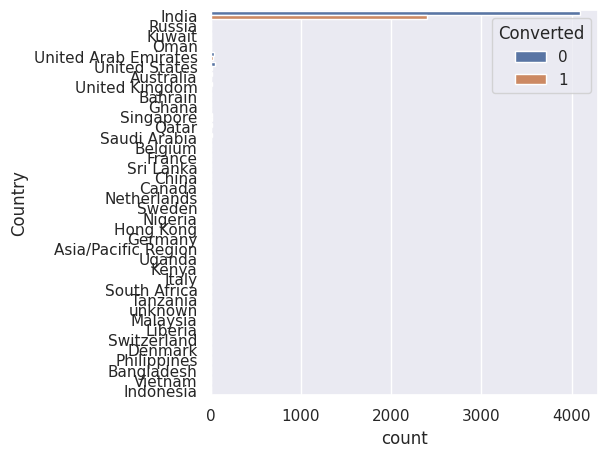

In [421]:
sns.countplot(y=lead_data_df['Country'],hue='Converted',data=lead_data_df)

                

The majority comes from India: we can drop this feature because it is highly imbalanced.

In [422]:
lead_data_df.drop(columns=['Country'],inplace=True)

In [423]:
len(lead_data_df.columns)

31

###City

In [424]:
lead_data_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [425]:
lead_data_df.City.describe()

count     5571  
unique    6     
top       Mumbai
freq      3222  
Name: City, dtype: object

<Axes: xlabel='count', ylabel='City'>

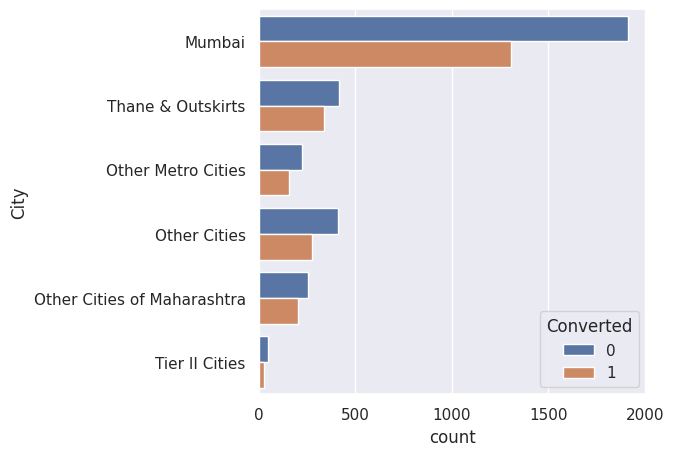

In [426]:
sns.countplot(y=lead_data_df['City'],hue='Converted',data=lead_data_df)


As we can see from the plot, the majority comes from Mumbai. We can impute it for the missing values.

In [427]:
## replace null values with most frequent value
print('Number of observations with null values in column City: {0}'.format(
    lead_data_df['City'].isnull().sum()))

# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data_df[['City']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data_df['City'] = imp.transform(lead_data_df[['City']]).ravel()

print('Number of  null values for the feature City after imputation: {0}'.format(
    lead_data_df['City'].isnull().sum()))

Number of observations with null values in column City: 3669
Most frequent value is : Mumbai
Number of  null values for the feature City after imputation: 0


<Axes: xlabel='count', ylabel='City'>

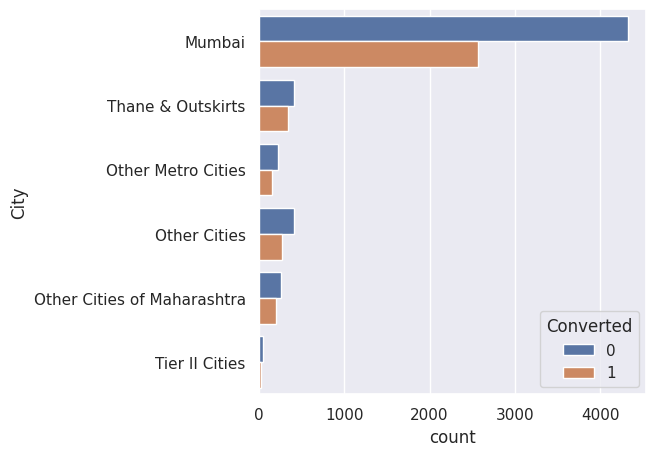

In [428]:
#Now recheck
sns.countplot(y=lead_data_df['City'],hue='Converted',data=lead_data_df)


In [429]:
lead_data_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [430]:
lead_data_df.columns

Index(['Converted', 'LeadOrigin', 'LeadSource', 'DndEmail', 'DndCall',
       'TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit', 'LastActivity',
       'Specialization', 'Occupation', 'MattersMost', 'Search', 'Magazine',
       'PaperArticle', 'EducationForum', 'Newspaper', 'DigitalAd',
       'Recommendation', 'ReceiveCourseUpdate', 'Tags', 'UpdateSupplyChain',
       'UpdateDMContent', 'City', 'ActivityIndex', 'ProfileIndex',
       'ActivityScore', 'ProfileScore', 'ChequePayment', 'FreeCopy',
       'LastNotableActivity'],
      dtype='object')

In [431]:
len(lead_data_df.columns)

31

###Specialization

In [432]:
lead_data_df.Specialization.describe()

count     5860              
unique    18                
top       Finance Management
freq      976               
Name: Specialization, dtype: object

In [433]:
lead_data_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness               73 
E-Business                           57 
Services Excellence                  40 
Name: Specialization, dtype: int64

<Axes: xlabel='count', ylabel='Specialization'>

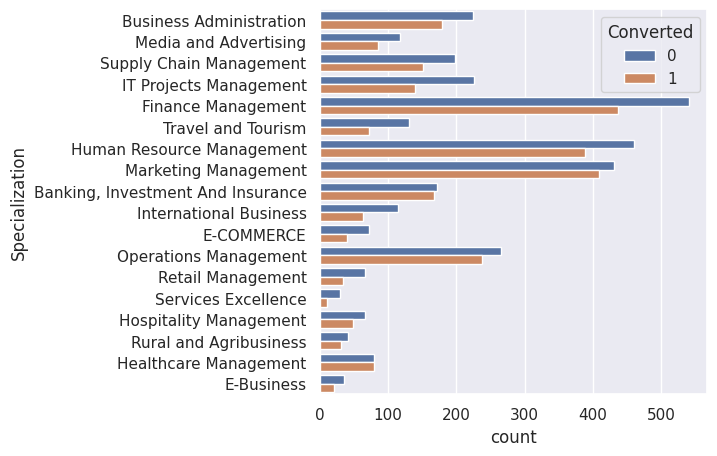

In [434]:
sns.countplot(y=lead_data_df['Specialization'],hue='Converted',data=lead_data_df)


In [435]:
lead_data_df['Specialization'].isnull().sum()

3380

There are many missing values, probably either the potential leads were students or they could not select the specialization. As the number is high, it is convenient to define a variable 'Others' 

In [436]:
lead_data_df['Specialization'] = lead_data_df['Specialization'].replace(np.nan, 'Others')

Now we can recheck and see that the new feature appears in the countplot

<Axes: xlabel='count', ylabel='Specialization'>

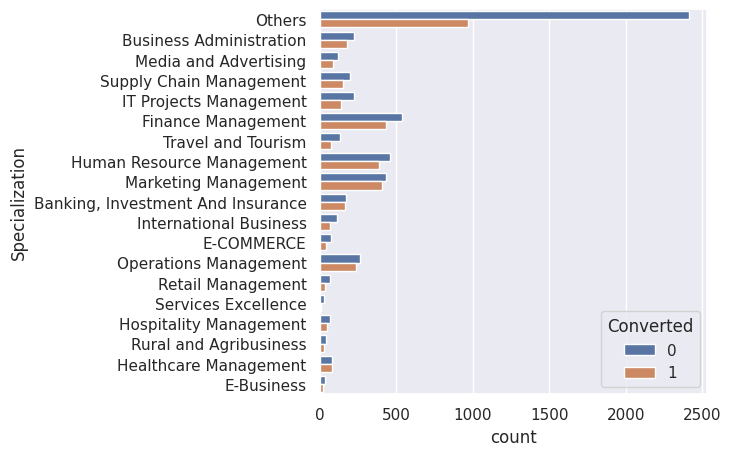

In [437]:
sns.countplot(y=lead_data_df['Specialization'],hue='Converted',data=lead_data_df)

###Occupation

We can reason in the same way for the Occupation feature

In [438]:
lead_data_df.Occupation.describe()

count     6550      
unique    6         
top       Unemployed
freq      5600      
Name: Occupation, dtype: object

<Axes: xlabel='count', ylabel='Occupation'>

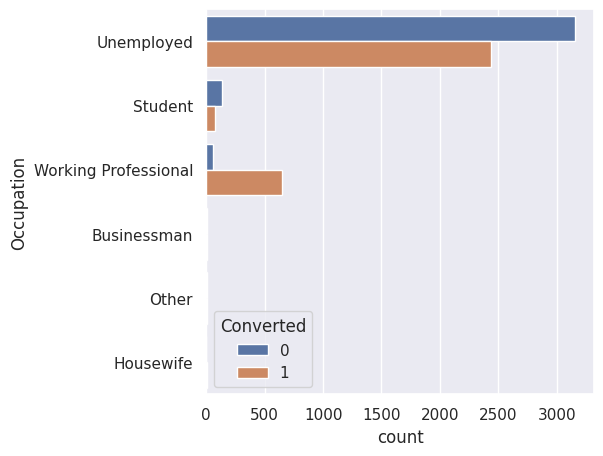

In [439]:
sns.countplot(y=lead_data_df['Occupation'],hue='Converted',data=lead_data_df)

It is reasonable to assume that field Occupation has not been found by the potential leads. For this reason, it has been left blank. We can rename Unemployment as a new feature 'Others'.  

In [440]:
lead_data_df['Occupation'] = lead_data_df['Occupation'].replace(np.nan, 'Others')

Again we can check that there no missing values.

In [441]:
lead_data_df['Occupation'].isnull().sum()

0

###Tags

In [442]:
lead_data_df.Tags.describe()

count     5887                               
unique    26                                 
top       Will revert after reading the email
freq      2072                               
Name: Tags, dtype: object

<Axes: xlabel='count', ylabel='Tags'>

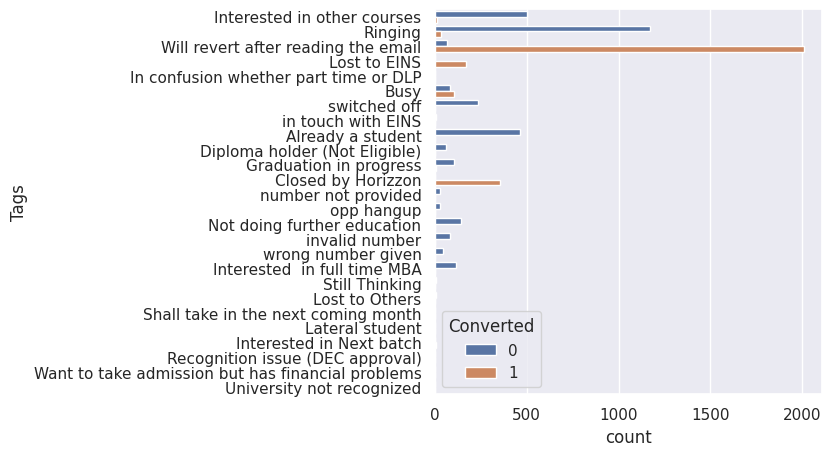

In [443]:
sns.countplot(y=lead_data_df['Tags'],hue='Converted',data=lead_data_df)

In [444]:
lead_data_df['Tags'].isnull().sum()

3353

It is reasonable to impute missing values to the most frequent one, namely 'Will revert after reading the email'

In [445]:
## replace null values with most frequent value
print('Number of observations with null values in column Tags: {0}'.format(
    lead_data_df['Tags'].isnull().sum()))

# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data_df[['Tags']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data_df['Tags'] = imp.transform(lead_data_df[['Tags']]).ravel()

print('Number of  null values for the feature Tags after imputation: {0}'.format(
    lead_data_df['Tags'].isnull().sum()))

Number of observations with null values in column Tags: 3353
Most frequent value is : Will revert after reading the email
Number of  null values for the feature Tags after imputation: 0


### MattersMost

In [446]:
lead_data_df.MattersMost.describe()

count     6531                   
unique    3                      
top       Better Career Prospects
freq      6528                   
Name: MattersMost, dtype: object

<Axes: xlabel='count', ylabel='MattersMost'>

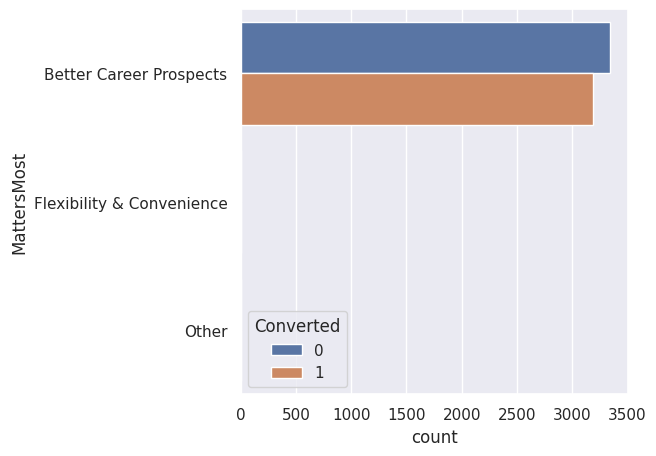

In [447]:
sns.countplot(y=lead_data_df['MattersMost'],hue='Converted',data=lead_data_df)

As we can see from the previous graph, most of the variation comes from 'Better Career Prospects'. We can drop this feature.

In [448]:
lead_data_df.drop(columns=['MattersMost'],inplace=True)

In [449]:
print('number of columns after dropping "MattersMost" feature is: {0}'.format(lead_data_df.shape[1]))

number of columns after dropping "MattersMost" feature is: 30


In [450]:
#Get the list of columns with missing% > 0%
percent_missing = lead_data_df.isnull().sum() * 100 / len(lead_data_df)
mis_value_df = pd.DataFrame({'column_name': lead_data_df.columns,
                                 'percent_missing': percent_missing})
mis_data_cols = list(mis_value_df[mis_value_df['percent_missing']>0]['column_name'])
print('Number of columns with data value missing % is : {0}'.format(len(mis_data_cols)))
mis_data_cols


Number of columns with data value missing % is : 8


['LeadSource',
 'TotalVisits',
 'PagesPerVisit',
 'LastActivity',
 'ActivityIndex',
 'ProfileIndex',
 'ActivityScore',
 'ProfileScore']

### ActivityIndex

<Axes: xlabel='count', ylabel='ActivityIndex'>

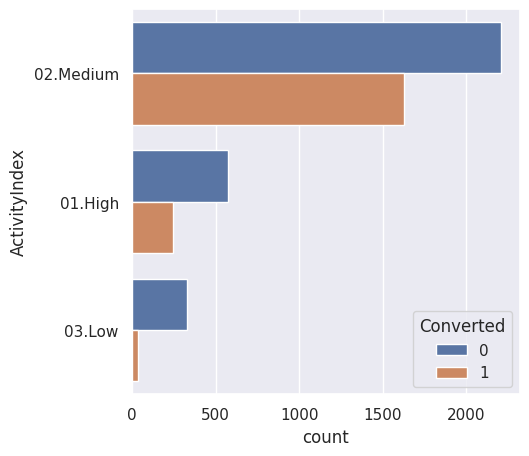

In [451]:
sns.countplot(y=lead_data_df['ActivityIndex'],hue='Converted',data=lead_data_df)

In [452]:
lead_data_df['ActivityIndex'].isnull().sum()

4218

There is too much variation for this feature. Furthermore, there is an high percentage of missing values. For these reasons, we can drop it.

In [453]:
lead_data_df.drop(columns=['ActivityIndex'],inplace=True)

### ProfileIndex

<Axes: xlabel='count', ylabel='ProfileIndex'>

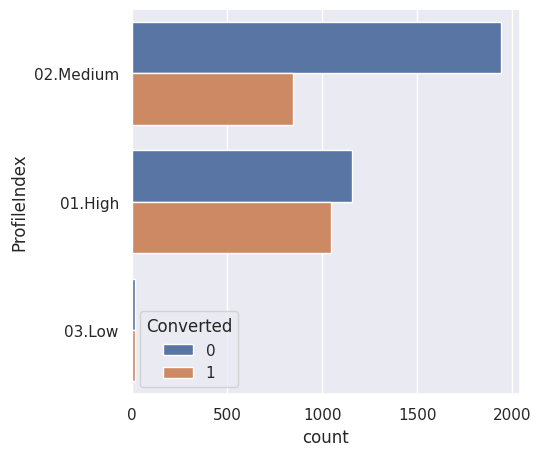

In [454]:
sns.countplot(y=lead_data_df['ProfileIndex'],hue='Converted',data=lead_data_df)

In this case, there is an high percentage of missing values.Even if the difference betwwen High and Medium categories is less remarkable  than the ActivityIndex, it is better to drop also this feature

In [455]:
lead_data_df.drop(columns=['ProfileIndex'],inplace=True)

### ActivityScore

<Axes: xlabel='count', ylabel='ActivityScore'>

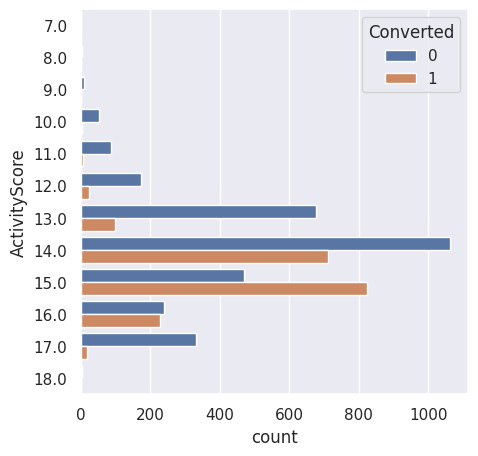

In [456]:
sns.countplot(y=lead_data_df['ActivityScore'],hue='Converted',data=lead_data_df)

In [457]:
lead_data_df['ActivityScore'].isnull().sum()

4218

Also in this case it is convenient to drop the column.


In [458]:
lead_data_df.drop(columns=['ActivityScore'],inplace=True)

### ProfileScore

We can reason in the same way also for this feature

<Axes: xlabel='count', ylabel='ProfileScore'>

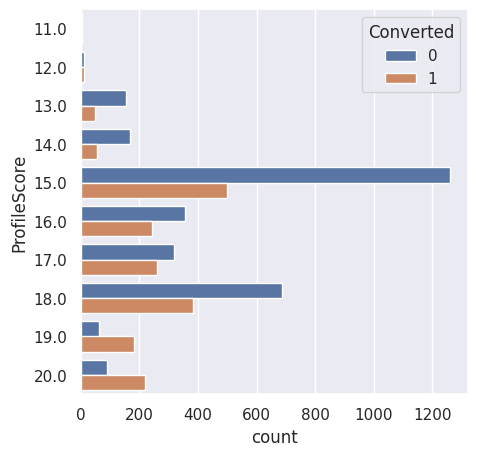

In [459]:
sns.countplot(y=lead_data_df['ProfileScore'],hue='Converted',data=lead_data_df)

In [460]:
lead_data_df['ProfileScore'].isnull().sum()

4218

In [461]:
lead_data_df.drop(columns=['ProfileScore'],inplace=True)

In [462]:
#Get Again the list of columns with missing% > 0%
percent_missing = lead_data_df.isnull().sum() * 100 / len(lead_data_df)
mis_value_df = pd.DataFrame({'column_name': lead_data_df.columns,
                                 'percent_missing': percent_missing})
mis_data_cols = list(mis_value_df[mis_value_df['percent_missing']>0]['column_name'])
print('Number of columns with data value missing % is : {0}'.format(len(mis_data_cols)))
mis_data_cols


Number of columns with data value missing % is : 4


['LeadSource', 'TotalVisits', 'PagesPerVisit', 'LastActivity']

### LeadSource

<Axes: xlabel='count', ylabel='LeadSource'>

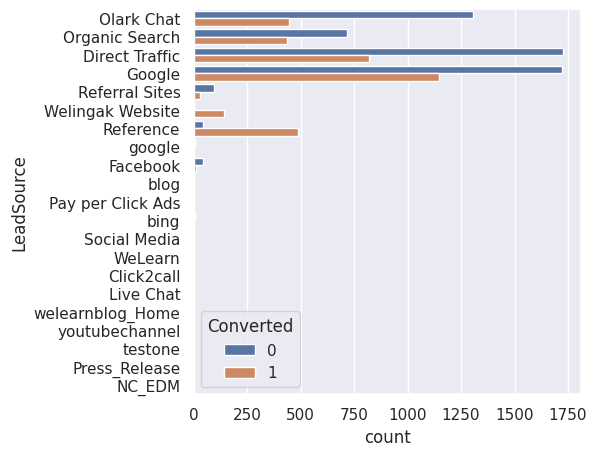

In [463]:
sns.countplot(y=lead_data_df['LeadSource'],hue='Converted',data=lead_data_df)

In [464]:
lead_data_df['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
google               5   
Click2call           4   
Press_Release        2   
Social Media         2   
Live Chat            2   
youtubechannel       1   
testone              1   
Pay per Click Ads    1   
welearnblog_Home     1   
WeLearn              1   
blog                 1   
NC_EDM               1   
Name: LeadSource, dtype: int64

There are 2 equivalent values, Google and google. It is convenient to use only 1 feature.

In [465]:
lead_data_df['LeadSource'].replace('google','Google',inplace=True)

We can also group many other features with a small counts into a unique 'Others'

In [466]:
lead_data_df['LeadSource'] = lead_data_df['LeadSource'].replace(
    ['bing','Click2call','Social Media','Press_Release','Live Chat','WeLearn','youtubechannel',
     'welearnblog_Home','NC_EDM','testone','Pay per Click Ads','blog'],'Others')
lead_data_df['LeadSource'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference           534 
Welingak Website    142 
Referral Sites      125 
Facebook            55  
Others              23  
Name: LeadSource, dtype: int64

In [467]:
lead_data_df['LeadSource'].isnull().sum()

36

In [468]:
## replace null values with most frequent value
print('Number of observations with null values in column LeadSource: {0}'.format(
    lead_data_df['LeadSource'].isnull().sum()))

# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data_df[['LeadSource']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data_df['LeadSource'] = imp.transform(lead_data_df[['LeadSource']]).ravel()

print('Number of  null values for the feature LeadSource after imputation: {0}'.format(
    lead_data_df['Tags'].isnull().sum()))

Number of observations with null values in column LeadSource: 36
Most frequent value is : Google
Number of  null values for the feature LeadSource after imputation: 0


Let us replace the missing values with the most frequent one, namely Google.

###PagesPerVisit

In [469]:
lead_data_df.PagesPerVisit.describe()

count    9103.000000
mean     2.362820   
std      2.161418   
min      0.000000   
25%      1.000000   
50%      2.000000   
75%      3.000000   
max      55.000000  
Name: PagesPerVisit, dtype: float64

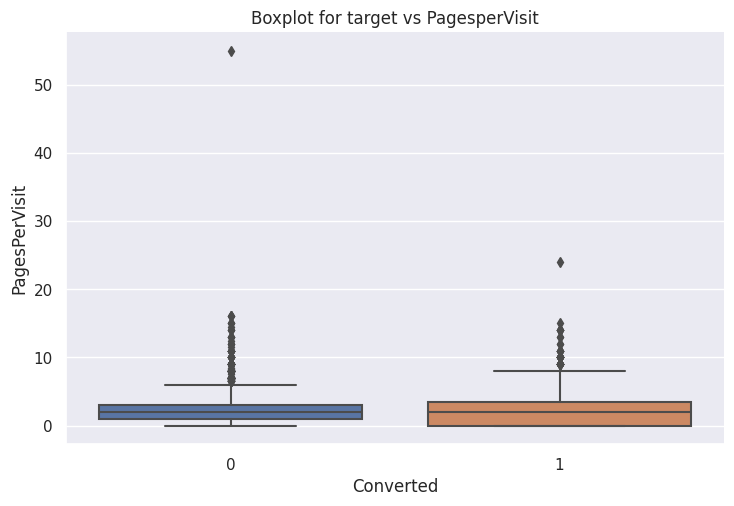

In [470]:
sns.catplot(x="Converted", y="PagesPerVisit", data=lead_data_df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs PagesperVisit")
plt.show()

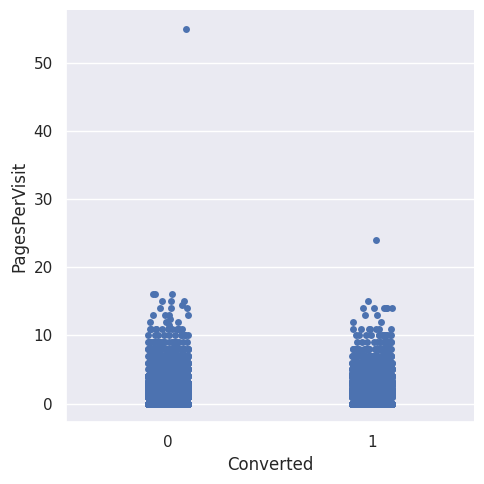

In [471]:
sns.catplot(data=lead_data_df, x="Converted", y="PagesPerVisit")

As it is confirmed by the previous graphs, we have outliers.

In [472]:
#Visualize the percentiles
lead_data_df['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])



count    9103.000000
mean     2.362820   
std      2.161418   
min      0.000000   
0%       0.000000   
5%       0.000000   
25%      1.000000   
50%      2.000000   
75%      3.000000   
90%      5.000000   
95%      6.000000   
99%      9.000000   
max      55.000000  
Name: PagesPerVisit, dtype: float64

Due to the presence of Outliers, It is better to use the Imputer class set to the median.

In [473]:
lead_data_df['PagesPerVisit'].isnull().sum()

137

In [474]:
# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'median')
imp.fit(lead_data_df[['PagesPerVisit']])

print('median value is : {0}'.format(imp.statistics_[0]))

lead_data_df['PagesPerVisit'] = imp.transform(lead_data_df[['PagesPerVisit']]).ravel()

print('Number of  null values for the feature PagesPerVisit after imputation: {0}'.format(
    lead_data_df['PagesPerVisit'].isnull().sum()))

median value is : 2.0
Number of  null values for the feature PagesPerVisit after imputation: 0


Let us visualize the values in the 99th percentile

PagerPerVisit percentile value: 9.0


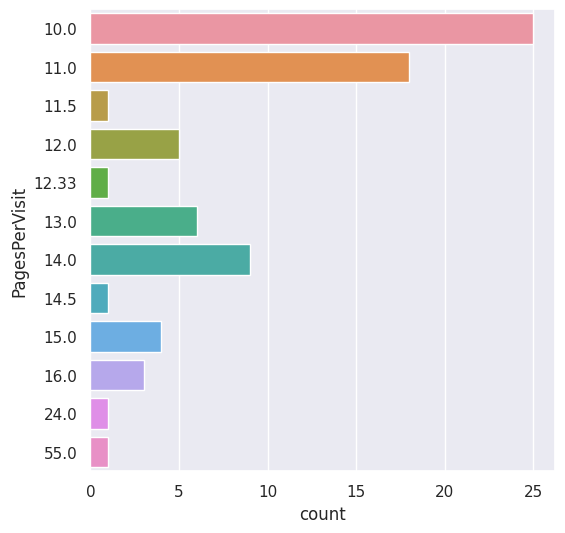

In [475]:
print('PagerPerVisit percentile value: {0}'.format(lead_data_df['PagesPerVisit'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=lead_data_df[lead_data_df['PagesPerVisit']>9]['PagesPerVisit'].sort_values());



In [476]:
lead_data_df[lead_data_df['PagesPerVisit']>15]['PagesPerVisit'].count()

5

Drop the values bigger than 15 for that feature.


In [477]:
lead_data_df.drop(index=lead_data_df[lead_data_df['PagesPerVisit']>15].index,inplace=True)

### TotalVisits

Repeat exactly the same procedure for the TotalVisits feature.

In [478]:
lead_data_df.TotalVisits.describe()


count    9098.000000
mean     3.433172   
std      4.815787   
min      0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
max      251.000000 
Name: TotalVisits, dtype: float64

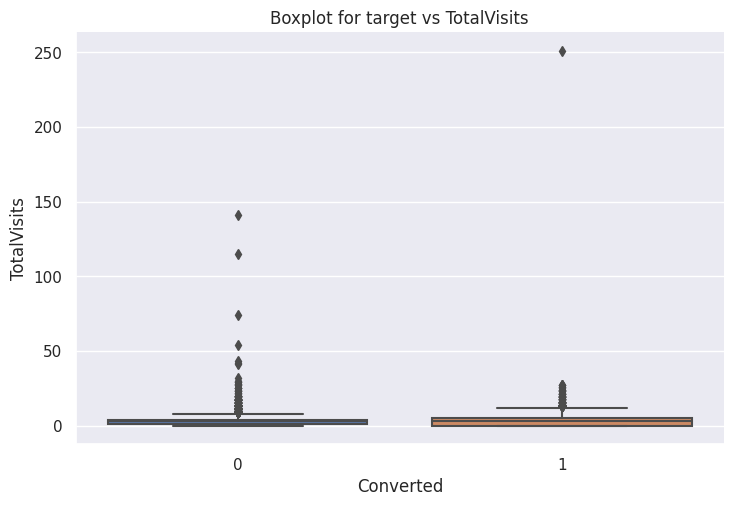

In [479]:
sns.catplot(x="Converted", y="TotalVisits", data=lead_data_df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs TotalVisits")
plt.show()

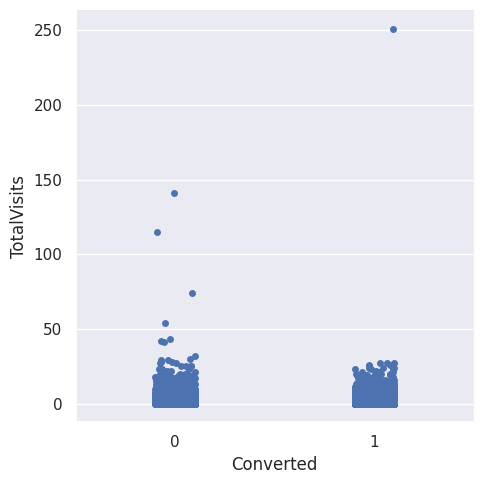

In [480]:
sns.catplot(data=lead_data_df, x="Converted", y="TotalVisits")

As we can see from the previous graphs, we should deal with outliers in this case too.

In [481]:
#Visualize the percentiles
lead_data_df['TotalVisits'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9098.000000
mean     3.433172   
std      4.815787   
min      0.000000   
0%       0.000000   
5%       0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
90%      7.000000   
95%      10.000000  
99%      17.000000  
max      251.000000 
Name: TotalVisits, dtype: float64

We should treat the missing values in a similar way as the previous one

In [482]:
lead_data_df['TotalVisits'].isnull().sum()

137

In [483]:
# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'median')
imp.fit(lead_data_df[['TotalVisits']])

print('median value is : {0}'.format(imp.statistics_[0]))

lead_data_df['TotalVisits'] = imp.transform(lead_data_df[['TotalVisits']]).ravel()

print('Number of  null values for the feature TotalVisits after imputation: {0}'.format(
    lead_data_df['TotalVisits'].isnull().sum()))

median value is : 3.0
Number of  null values for the feature TotalVisits after imputation: 0


Let us visualize the percentiles for this feature.

In [484]:
print('TotalVisits percentile value: {0}'.format(lead_data_df['TotalVisits'].quantile(0.99)))



TotalVisits percentile value: 17.0


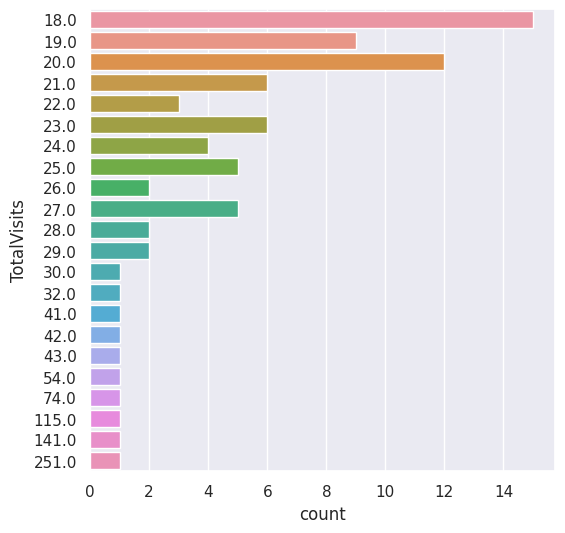

In [485]:
plt.figure(figsize=(6,6));
sns.countplot(y=lead_data_df[lead_data_df['TotalVisits']>17]['TotalVisits'].sort_values());



As we can see from the graph, there are many outliers. We can drop the ones starting from 54.

In [486]:
lead_data_df.drop(index=lead_data_df[lead_data_df['TotalVisits']>54].index,inplace=True)

In [487]:
list(lead_data_df.columns)

['Converted',
 'LeadOrigin',
 'LeadSource',
 'DndEmail',
 'DndCall',
 'TotalVisits',
 'TotalWebsiteTime',
 'PagesPerVisit',
 'LastActivity',
 'Specialization',
 'Occupation',
 'Search',
 'Magazine',
 'PaperArticle',
 'EducationForum',
 'Newspaper',
 'DigitalAd',
 'Recommendation',
 'ReceiveCourseUpdate',
 'Tags',
 'UpdateSupplyChain',
 'UpdateDMContent',
 'City',
 'ChequePayment',
 'FreeCopy',
 'LastNotableActivity']

### LastActivity

In [488]:
lead_data_df['LastActivity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation         972 
Page Visited on Website         632 
Converted to Lead               428 
Email Bounced                   326 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     93  
Unsubscribed                    61  
Had a Phone Conversation        30  
Approached upfront              9   
View in browser link Clicked    6   
Email Received                  2   
Email Marked Spam               2   
Visited Booth in Tradeshow      1   
Resubscribed to emails          1   
Name: LastActivity, dtype: int64

<Axes: xlabel='count', ylabel='LastActivity'>

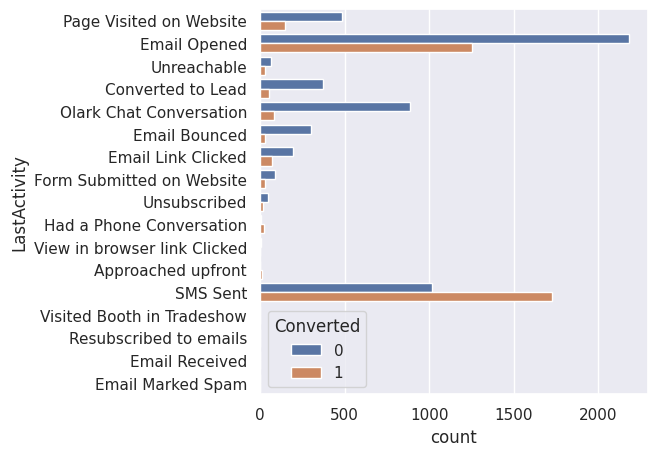

In [489]:
sns.countplot(y=lead_data_df['LastActivity'],hue='Converted',data=lead_data_df)

We can combine  the categorical values less frequent into a new one called 'Others'. 

In [490]:
lead_data_df['LastActivity'] = lead_data_df['LastActivity'].replace(
    ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
     'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')
lead_data_df['LastActivity'].value_counts()


Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation      972 
Page Visited on Website      632 
Converted to Lead            428 
Email Bounced                326 
Email Link Clicked           267 
Others                       205 
Form Submitted on Website    116 
Name: LastActivity, dtype: int64

Let us perform the imputation with the most frequent value

In [491]:
## replace null values
print('Number of observations with null values in column LastActivity: {0}'.format(
    lead_data_df['LastActivity'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data_df[['LastActivity']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data_df['LastActivity'] = imp.transform(lead_data_df[['LastActivity']]).ravel()

print('Number of observations with null values in column LastActivity after imputation: {0}'.format(
    lead_data_df['LastActivity'].isnull().sum()))


Number of observations with null values in column LastActivity: 103
Most frequent value is : Email Opened
Number of observations with null values in column LastActivity after imputation: 0


In [492]:
lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9231 non-null   int64  
 1   LeadOrigin           9231 non-null   object 
 2   LeadSource           9231 non-null   object 
 3   DndEmail             9231 non-null   object 
 4   DndCall              9231 non-null   object 
 5   TotalVisits          9231 non-null   float64
 6   TotalWebsiteTime     9231 non-null   int64  
 7   PagesPerVisit        9231 non-null   float64
 8   LastActivity         9231 non-null   object 
 9   Specialization       9231 non-null   object 
 10  Occupation           9231 non-null   object 
 11  Search               9231 non-null   object 
 12  Magazine             9231 non-null   object 
 13  PaperArticle         9231 non-null   object 
 14  EducationForum       9231 non-null   object 
 15  Newspaper            9231 non-null   o

In [493]:
lead_data_df.nunique()

Converted              2   
LeadOrigin             5   
LeadSource             9   
DndEmail               2   
DndCall                2   
TotalVisits            36  
TotalWebsiteTime       1730
PagesPerVisit          107 
LastActivity           9   
Specialization         19  
Occupation             7   
Search                 2   
Magazine               1   
PaperArticle           2   
EducationForum         2   
Newspaper              2   
DigitalAd              2   
Recommendation         2   
ReceiveCourseUpdate    1   
Tags                   26  
UpdateSupplyChain      1   
UpdateDMContent        1   
City                   6   
ChequePayment          1   
FreeCopy               2   
LastNotableActivity    16  
dtype: int64

We have dealt with all the missing values. Now we further analyze other features. 

### Magazine

In [494]:
lead_data_df['Magazine'].value_counts()

No    9231
Name: Magazine, dtype: int64

In [495]:
print('number of columns before dropping column "Magazine" is: {0}'.format(lead_data_df.shape[1]))
lead_data_df.drop(columns=['Magazine'], inplace=True)

number of columns before dropping column "Magazine" is: 26


### ReceiveCourseUpdate

In [496]:
lead_data_df['ReceiveCourseUpdate'].value_counts()

No    9231
Name: ReceiveCourseUpdate, dtype: int64

In [497]:
print('number of features before dropping feature "ReceiveCourseUpdate" is: {0}'.format(lead_data_df.shape[1]))
lead_data_df.drop(columns=['ReceiveCourseUpdate'], inplace=True)

number of features before dropping feature "ReceiveCourseUpdate" is: 25


### UpdateSupplyChain

In [498]:
lead_data_df['UpdateSupplyChain'].value_counts()

No    9231
Name: UpdateSupplyChain, dtype: int64

In [499]:
print('number of features before dropping feature "UpdateSupplyChain" is: {0}'.format(lead_data_df.shape[1]))
lead_data_df.drop(columns=['UpdateSupplyChain'], inplace=True)

number of features before dropping feature "UpdateSupplyChain" is: 24


### UpdateDMContent

In [500]:
lead_data_df['UpdateDMContent'].value_counts()

No    9231
Name: UpdateDMContent, dtype: int64

In [501]:
print('number of features before dropping feature "UpdateDMContent" is: {0}'.format(lead_data_df.shape[1]))
lead_data_df.drop(columns=['UpdateDMContent'], inplace=True)

number of features before dropping feature "UpdateDMContent" is: 23


### ChequePayment 

In [502]:
lead_data_df['ChequePayment'].value_counts()

No    9231
Name: ChequePayment, dtype: int64

In [503]:
print('number of features before dropping feature "ChequePayment" is: {0}'.format(lead_data_df.shape[1]))
lead_data_df.drop(columns=['ChequePayment'], inplace=True)

number of features before dropping feature "ChequePayment" is: 22


In [504]:
lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9231 non-null   int64  
 1   LeadOrigin           9231 non-null   object 
 2   LeadSource           9231 non-null   object 
 3   DndEmail             9231 non-null   object 
 4   DndCall              9231 non-null   object 
 5   TotalVisits          9231 non-null   float64
 6   TotalWebsiteTime     9231 non-null   int64  
 7   PagesPerVisit        9231 non-null   float64
 8   LastActivity         9231 non-null   object 
 9   Specialization       9231 non-null   object 
 10  Occupation           9231 non-null   object 
 11  Search               9231 non-null   object 
 12  PaperArticle         9231 non-null   object 
 13  EducationForum       9231 non-null   object 
 14  Newspaper            9231 non-null   object 
 15  DigitalAd            9231 non-null   o

## Feature Selection 

Let us analyze directly some features, to check if they are correlated in some way to the target variable.

### Converted

In [505]:
lead_data_df['Converted'].value_counts()



0    5672
1    3559
Name: Converted, dtype: int64

In [506]:
lead_data_df['Converted'].value_counts(1)

0    0.614451
1    0.385549
Name: Converted, dtype: float64

Let us print the percentages for the two features.

In [507]:
print('Value "0" in Target feature: {0:.2%}'.format(lead_data_df['Converted'].value_counts(1)[0]))
print('Value "1" in Target feature: {0:.2%}'.format(lead_data_df['Converted'].value_counts(1)[1]))

Value "0" in Target feature: 61.45%
Value "1" in Target feature: 38.55%


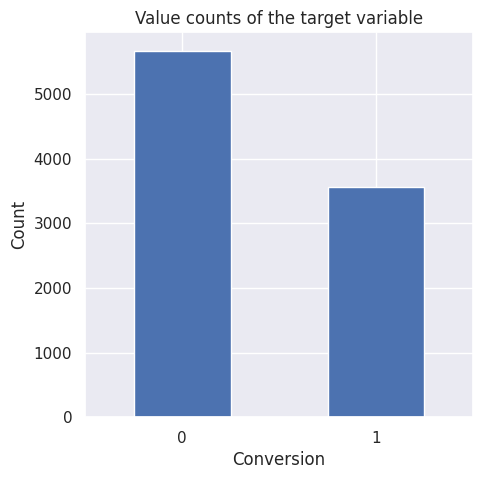

In [508]:
lead_data_df.Converted.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Conversion")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()




As we can see from the graph, there is no class imbalance.

### LeadOrigin

In [509]:
lead_data_df['LeadOrigin'].value_counts()



Landing Page Submission    4879
API                        3578
Lead Add Form              718 
Lead Import                55  
Quick Add Form             1   
Name: LeadOrigin, dtype: int64

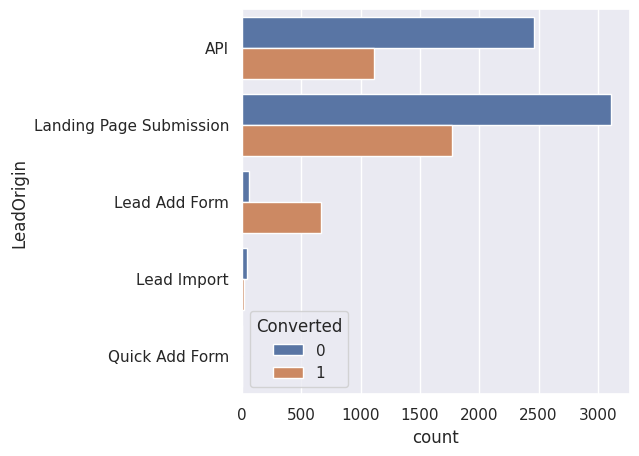

In [510]:
sns.countplot(y='LeadOrigin',hue='Converted',data=lead_data_df);

Let us plot the percentage of each category corresponding to converted or not converted leads.

In [511]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['LeadOrigin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadOrigin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,68.87,63.78,7.52,76.36,0.0
1,31.13,36.22,92.48,23.64,100.0


In [512]:


## let's define a function 
## to plot categorical variables based on a particular
## hue and to print the percentage.

def countplot_with_perc(x, data, hue):
    
    # Define the plot
    ax         = sns.countplot(x=x, data=data, hue=hue);
    bars       = ax.patches
    half       = int(len(bars)/2)
    left_bars  = bars[:half]
    right_bars = bars[half:]

    # Add the percentage
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total    = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2.,
            height_l + 30, '{0:.0%}'.format(height_l/total), ha='center');
        ax.text(right.get_x() + right.get_width()/2.,
            height_r + 30, '{0:.0%}'.format(height_r/total), ha='center');


## Define a specific histplot for continuous variables.

def histplot_continuous(x, data, hue):
    sns.histplot(data=data, x=x, hue=hue,
        kde=True, bins=15, palette='tab10', multiple='stack', line_kws={'lw': 5});



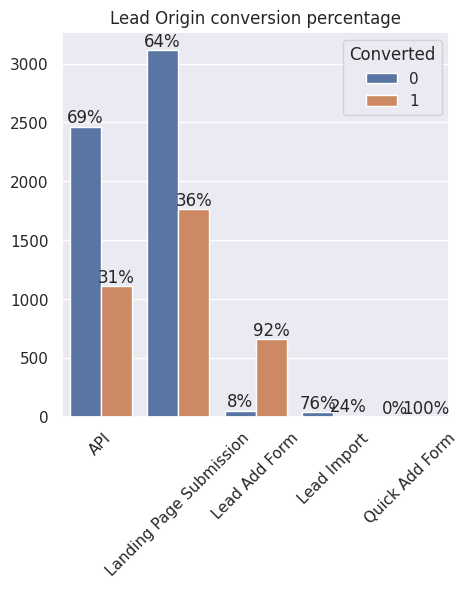

In [513]:
plt.figure(figsize=(5, 5))
countplot_with_perc(x='LeadOrigin', data=lead_data_df, hue='Converted');
plt.title('Lead Origin conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);


We obtain exactly the previous percentage, but with an immediate ovweview. 

We notice that, even if the category 'Landing Page Submission' is the most frequent one, the best conversion rate is associated with 'Lead Add Form'. 

### LeadSource 

In [514]:
lead_data_df['LeadSource'].value_counts()

Google              2908
Direct Traffic      2538
Olark Chat          1755
Organic Search      1153
Reference           534 
Welingak Website    142 
Referral Sites      123 
Facebook            55  
Others              23  
Name: LeadSource, dtype: int64

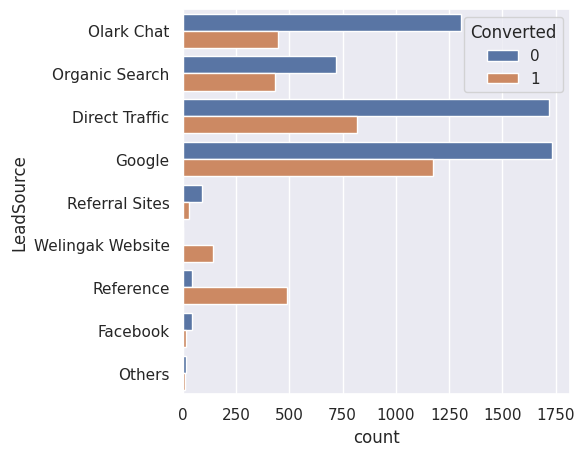

In [515]:
sns.countplot(y='LeadSource',hue='Converted',data=lead_data_df);

In [516]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['LeadSource']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadSource,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,,
0,67.81,76.36,59.56,74.47,62.27,60.87,8.24,74.8,1.41
1,32.19,23.64,40.44,25.53,37.73,39.13,91.76,25.2,98.59


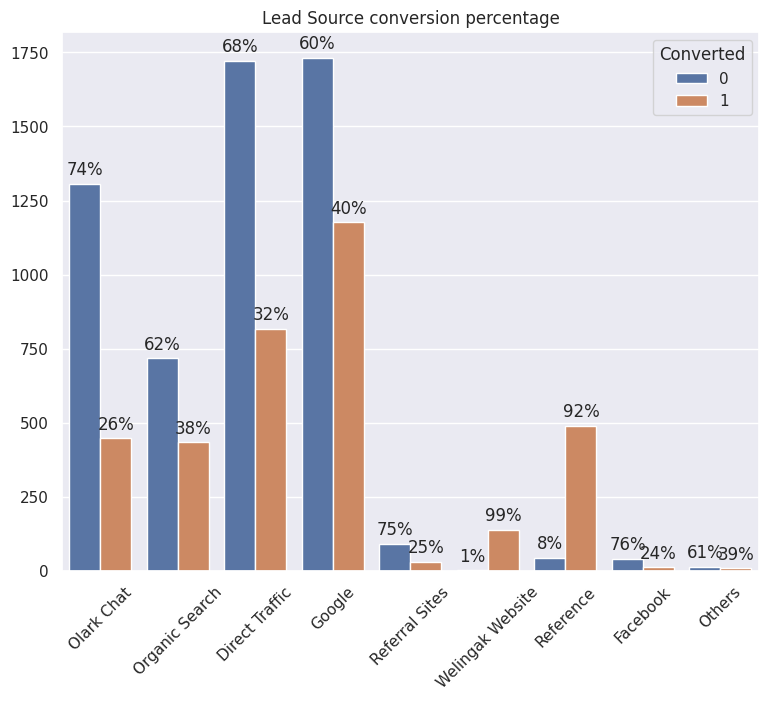

In [517]:
plt.figure(figsize=(9, 7))
countplot_with_perc(x='LeadSource', data=lead_data_df, hue='Converted');
plt.title('Lead Source conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

From the crosstable and the previous plot, we can see that the maximum leads are generated from the Google, while the category 'Welingak Website' has the highest lead conversion rate.

### Occupation

Let us repeat the same procedure to visualize the relationship of the target with this feature.

In [518]:
lead_data_df['Occupation'].value_counts()

Unemployed              5595
Others                  2686
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: Occupation, dtype: int64

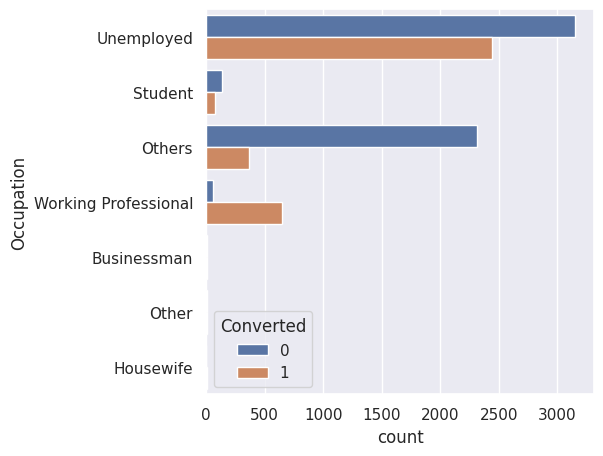

In [519]:
sns.countplot(y='Occupation',hue='Converted',data=lead_data_df);

In [520]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['Occupation']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Occupation,Businessman,Housewife,Other,Others,Student,Unemployed,Working Professional
Converted,,,,,,,
0,37.5,0.0,37.5,86.26,62.86,56.39,8.36
1,62.5,100.0,62.5,13.74,37.14,43.61,91.64


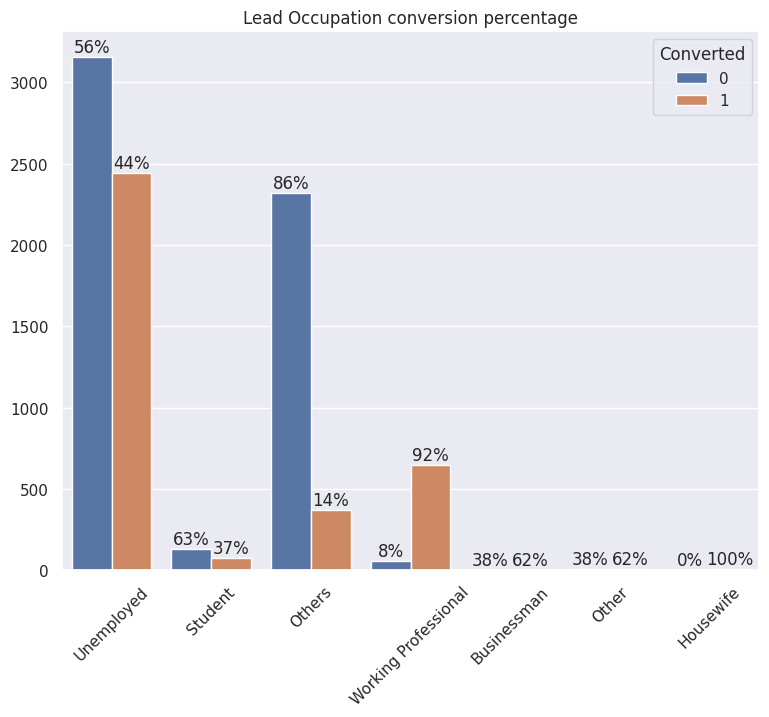

In [521]:
plt.figure(figsize=(9, 7))
countplot_with_perc(x='Occupation', data=lead_data_df, hue='Converted');
plt.title('Lead Occupation conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

### LastActivity

In [522]:
lead_data_df['LastActivity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation      972 
Page Visited on Website      632 
Converted to Lead            428 
Email Bounced                326 
Email Link Clicked           267 
Others                       205 
Form Submitted on Website    116 
Name: LastActivity, dtype: int64

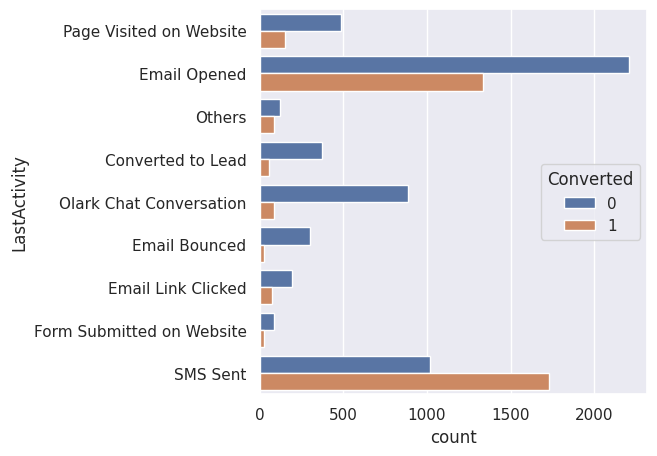

In [523]:
sns.countplot(y='LastActivity',hue='Converted',data=lead_data_df);

In [524]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['LastActivity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LastActivity,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Others,Page Visited on Website,SMS Sent
Converted,,,,,,,,,
0,87.38,92.02,72.66,62.32,75.86,91.36,59.02,76.42,37.09
1,12.62,7.98,27.34,37.68,24.14,8.64,40.98,23.58,62.91


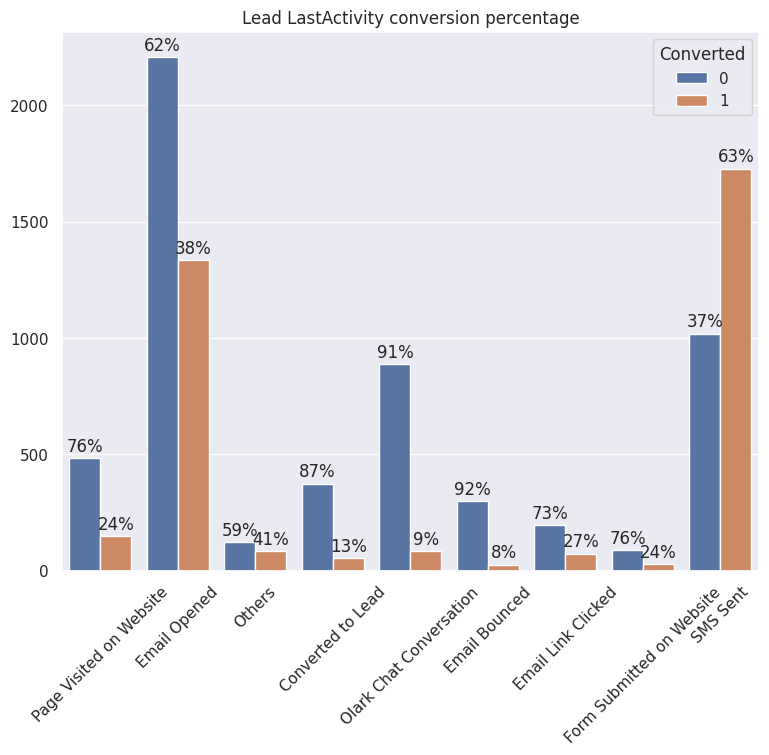

In [525]:
plt.figure(figsize=(9, 7))
countplot_with_perc(x='LastActivity', data=lead_data_df, hue='Converted');
plt.title('Lead LastActivity conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

As we can see from the previous graphs, the most frequent category is 'Email Opened', while the highest conversion rate is related to the category SMS Sent.

### DndEmail

In [526]:
lead_data_df['DndEmail'].value_counts()

No     8503
Yes    728 
Name: DndEmail, dtype: int64

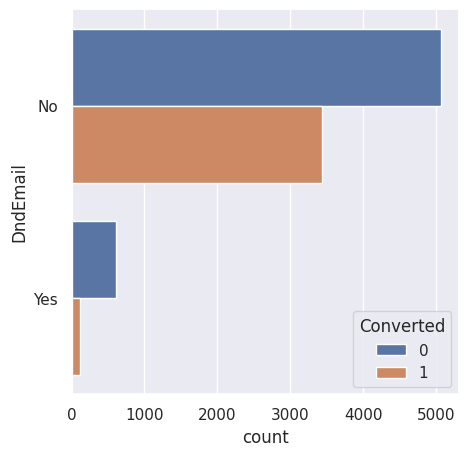

In [527]:
sns.countplot(y='DndEmail',hue='Converted',data=lead_data_df);

In [528]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['DndEmail']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

DndEmail,No,Yes
Converted,,
0,59.53,83.79
1,40.47,16.21


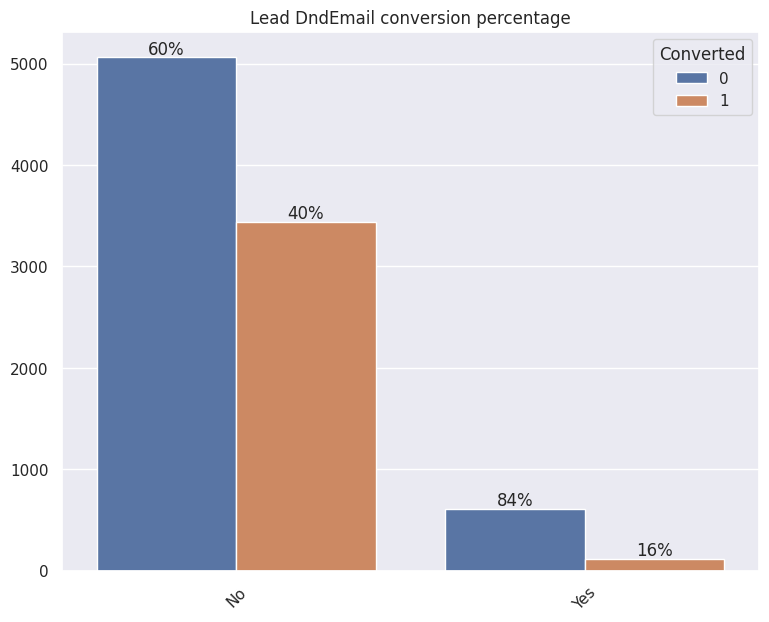

In [529]:
plt.figure(figsize=(9, 7))
countplot_with_perc(x='DndEmail', data=lead_data_df, hue='Converted');
plt.title('Lead DndEmail conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

The category 'No' is the most influential one for the lead conversion rate.

### FreeCopy

In [530]:
lead_data_df['FreeCopy'].value_counts()

No     6348
Yes    2883
Name: FreeCopy, dtype: int64

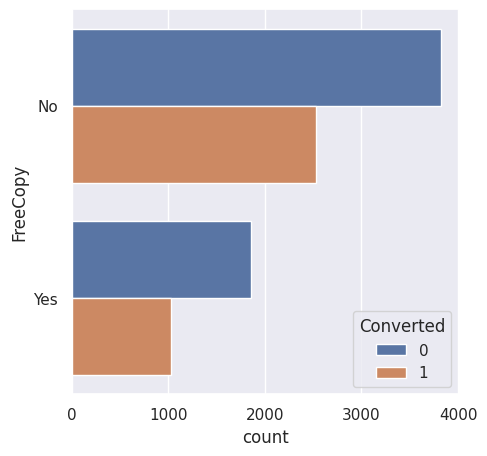

In [531]:
sns.countplot(y='FreeCopy',hue='Converted',data=lead_data_df);

In [532]:
crosstab_df = pd.crosstab(lead_data_df['Converted'],
            lead_data_df['FreeCopy']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

FreeCopy,No,Yes
Converted,,
0,60.14,64.31
1,39.86,35.69


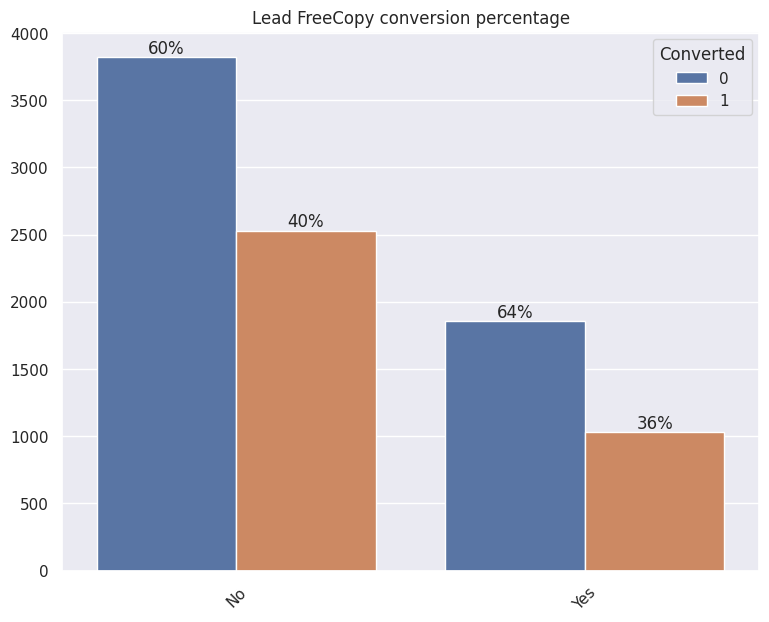

In [533]:
plt.figure(figsize=(9, 7))
countplot_with_perc(x='FreeCopy', data=lead_data_df, hue='Converted');
plt.title('Lead FreeCopy conversion percentage')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

### Categorical features 

In [534]:
lead_data_df['DndCall'].value_counts()

No     9229
Yes    2   
Name: DndCall, dtype: int64

In [535]:
lead_data_df['Search'].value_counts()

No     9217
Yes    14  
Name: Search, dtype: int64

In [536]:
lead_data_df['PaperArticle'].value_counts()

No     9229
Yes    2   
Name: PaperArticle, dtype: int64

In [537]:
lead_data_df['EducationForum'].value_counts()

No     9230
Yes    1   
Name: EducationForum, dtype: int64

In [538]:
lead_data_df['Newspaper'].value_counts()


No     9230
Yes    1   
Name: Newspaper, dtype: int64

In [539]:
lead_data_df['DigitalAd'].value_counts()

No     9227
Yes    4   
Name: DigitalAd, dtype: int64

In [540]:
lead_data_df['Recommendation'].value_counts()

No     9224
Yes    7   
Name: Recommendation, dtype: int64

In [541]:
lead_data_df['FreeCopy'].value_counts()



No     6348
Yes    2883
Name: FreeCopy, dtype: int64

In [542]:
lead_data_df.FreeCopy.describe()

count     9231
unique    2   
top       No  
freq      6348
Name: FreeCopy, dtype: object

There is a small variation for these particular features: we can drop them.

### Specialization

In [543]:
lead_data_df['Specialization'].value_counts()

Others                               3377
Finance Management                   975 
Human Resource Management            847 
Marketing Management                 838 
Operations Management                503 
Business Administration              403 
IT Projects Management               364 
Supply Chain Management              348 
Banking, Investment And Insurance    338 
Travel and Tourism                   203 
Media and Advertising                203 
International Business               178 
Healthcare Management                159 
Hospitality Management               114 
E-COMMERCE                           112 
Retail Management                    100 
Rural and Agribusiness               72  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64

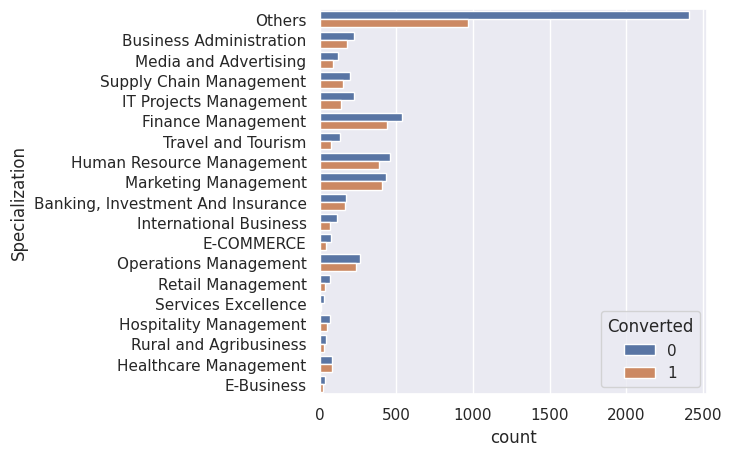

In [544]:
sns.countplot(y='Specialization',hue='Converted',data=lead_data_df);

This feature is highly imbalanced: it is convenient to drop it.

In [545]:
lead_data_df.drop(columns=['Specialization'],inplace=True)

In [546]:
lead_data_df.drop(columns=['DndCall','Search','PaperArticle','EducationForum','Newspaper',
                           'DigitalAd','Recommendation'],inplace=True)
print('number of columns after dropping those features are: {0}'.format(lead_data_df.shape[1]))

number of columns after dropping those features are: 13


In [547]:
lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Converted            9231 non-null   int64  
 1   LeadOrigin           9231 non-null   object 
 2   LeadSource           9231 non-null   object 
 3   DndEmail             9231 non-null   object 
 4   TotalVisits          9231 non-null   float64
 5   TotalWebsiteTime     9231 non-null   int64  
 6   PagesPerVisit        9231 non-null   float64
 7   LastActivity         9231 non-null   object 
 8   Occupation           9231 non-null   object 
 9   Tags                 9231 non-null   object 
 10  City                 9231 non-null   object 
 11  FreeCopy             9231 non-null   object 
 12  LastNotableActivity  9231 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1009.6+ KB
